### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

### Part 1: Data Preprocessing

In [3]:
dataset = pd.read_csv("./data/Churn_Modelling.csv")

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
X = X.values
y = y.values

In [9]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [10]:
y

array([1, 0, 1, ..., 1, 1, 0])

### Part 2: Encoding Categorical Data

#### Label Encoding for "Gender" Column

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
le.fit_transform(X[:, 2])

array([0, 0, 0, ..., 0, 1, 0])

In [14]:
X[:, 2] = le.fit_transform(X[:, 2])

In [15]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

#### One Hot Encoding for "Geography" Column

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder="passthrough")

In [18]:
ct.fit_transform(X)

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [19]:
X = ct.fit_transform(X)

In [20]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

### Part 3: Spliting the Data

#### Spliting the Dataset into Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
x_train

array([[0.0, 0.0, 1.0, ..., 1, 0, 163830.64],
       [0.0, 1.0, 0.0, ..., 1, 1, 57098.0],
       [1.0, 0.0, 0.0, ..., 1, 0, 185630.76],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 0, 181429.87],
       [0.0, 0.0, 1.0, ..., 1, 1, 148750.16],
       [0.0, 1.0, 0.0, ..., 1, 0, 118855.26]], dtype=object)

In [25]:
x_test

array([[0.0, 1.0, 0.0, ..., 1, 1, 192852.67],
       [1.0, 0.0, 0.0, ..., 1, 0, 128702.1],
       [0.0, 0.0, 1.0, ..., 1, 1, 75732.25],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 0, 141533.19],
       [0.0, 1.0, 0.0, ..., 1, 1, 11276.48],
       [0.0, 1.0, 0.0, ..., 1, 0, 192950.6]], dtype=object)

In [26]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

### Part 4: Scale the Feature

#### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
x_train

array([[0.0, 0.0, 1.0, ..., 1, 0, 163830.64],
       [0.0, 1.0, 0.0, ..., 1, 1, 57098.0],
       [1.0, 0.0, 0.0, ..., 1, 0, 185630.76],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 0, 181429.87],
       [0.0, 0.0, 1.0, ..., 1, 1, 148750.16],
       [0.0, 1.0, 0.0, ..., 1, 0, 118855.26]], dtype=object)

In [31]:
sc.fit_transform(x_train)

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [32]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
x_test

array([[-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  1.61255917]])

### Part 5: Building the ANN

#### Initializing the Ann

In [34]:
ann = tf.keras.Sequential()

#### Adding the Input Layer and First Hidden Layer

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) # 6 Nodes

#### Adding the Second Hidden Layer

In [36]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### Adding the Output Layer

In [37]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Part 6: Training the ANN

#### Compile ANN

In [38]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Training the ANN on Training Set

In [39]:
ann.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5339 - accuracy: 0.7951
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7966
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8018
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8039
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8065
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8121
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8163
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8191
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8217
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4139 - accura

### Part 7: Making the Prediction and Evaluation the Model

Use our ANN model to predict if the customer with following informations will leave the bank:
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40
* Tenure: 3 years
* Balance: 60000
* Number of Products: 2
* Does this customer have a credit card? Yes
* Is this customer an Active Member? Yes
* Estimated Salary: 50000
### So, Shoud we say goodbye to that customer?

In [40]:
person_1 = [1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]

In [41]:
sc.transform([person_1])

array([[ 0.98560362, -0.5698444 , -0.57369368, -0.52111599,  0.91601335,
         0.10961719, -0.68538967, -0.2569057 ,  0.8095029 ,  0.64259497,
         0.9687384 , -0.87203322]])

In [42]:
person_1 = sc.transform([person_1])

In [43]:
ann.predict(person_1)

1/1 [==============================] - 0s 111ms/step


array([[0.03328454]], dtype=float32)

In [44]:
print(ann.predict(person_1) > 0.5)

1/1 [==============================] - 0s 19ms/step
[[False]]


In [45]:
person_2 = [[1, 0, 0, 619, 0,	42,	2, 0, 1, 1, 1, 101348.88]]

In [46]:
sc.transform(person_2)

array([[ 0.98560362, -0.5698444 , -0.57369368, -0.32524648, -1.09168714,
         0.30102557, -1.031415  , -1.21571749, -0.92159124,  0.64259497,
         0.9687384 ,  0.02045017]])

In [47]:
Hargrave = sc.transform(person_2)

In [48]:
print(ann.predict(person_2) > 0.5)

1/1 [==============================] - 0s 63ms/step
[[False]]


### Part 7: Predicting the Result

In [49]:
y_pred = ann.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [50]:
y_pred

array([[0.31775314],
       [0.3664011 ],
       [0.24597415],
       ...,
       [0.12962882],
       [0.18340558],
       [0.18794699]], dtype=float32)

In [51]:
y_pred = (y_pred > 0.5)

In [52]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [53]:
y_pred.shape, y_test.shape

((2000, 1), (2000,))

In [54]:
np.concatenate((y_pred, y_test.reshape(2000, 1)), 1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [55]:
test = np.concatenate((y_pred, y_test.reshape(2000, 1)), 1)

In [56]:
np.mean(np.abs(test[:, 0], test[:, 1]))

0.1395

### Confusion Matrix & Classification Report

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(confusion_matrix(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1527   68]
 [ 194  211]]


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.76      0.52      0.62       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



#### Accuracy Score

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print(accuracy_score(y_test, y_pred))

0.869


### Practice

In [62]:
import numpy as np
import tensorflow as tf

In [63]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y = np.sin(x)

In [64]:
x.shape

(1000, 1)

In [65]:
y

array([[ 2.44929360e-16],
       [ 1.25786178e-02],
       [ 2.51552454e-02],
       [ 3.77278927e-02],
       [ 5.02945704e-02],
       [ 6.28532900e-02],
       [ 7.54020646e-02],
       [ 8.79389084e-02],
       [ 1.00461838e-01],
       [ 1.12968871e-01],
       [ 1.25458030e-01],
       [ 1.37927338e-01],
       [ 1.50374822e-01],
       [ 1.62798512e-01],
       [ 1.75196443e-01],
       [ 1.87566653e-01],
       [ 1.99907185e-01],
       [ 2.12216086e-01],
       [ 2.24491409e-01],
       [ 2.36731210e-01],
       [ 2.48933554e-01],
       [ 2.61096510e-01],
       [ 2.73218154e-01],
       [ 2.85296566e-01],
       [ 2.97329837e-01],
       [ 3.09316061e-01],
       [ 3.21253344e-01],
       [ 3.33139795e-01],
       [ 3.44973534e-01],
       [ 3.56752688e-01],
       [ 3.68475395e-01],
       [ 3.80139798e-01],
       [ 3.91744053e-01],
       [ 4.03286322e-01],
       [ 4.14764781e-01],
       [ 4.26177612e-01],
       [ 4.37523010e-01],
       [ 4.48799180e-01],
       [ 4.6

In [66]:
ann = tf.keras.models.Sequential()

In [67]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [68]:
ann.add(tf.keras.layers.Dense(units=12, activation='sigmoid'))

In [69]:
ann.add(tf.keras.layers.Dense(units=1))

In [70]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [71]:
ann.fit(x, y, epochs=1000, batch_size=16)

Epoch 1/1000
63/63 [==============================] - 1s 2ms/step - loss: 0.6041 - mean_squared_error: 0.6041
Epoch 2/1000
63/63 [==============================] - 0s 2ms/step - loss: 0.4781 - mean_squared_error: 0.4781
Epoch 3/1000
63/63 [==============================] - 0s 2ms/step - loss: 0.4493 - mean_squared_error: 0.4493
Epoch 4/1000
63/63 [==============================] - 0s 2ms/step - loss: 0.4415 - mean_squared_error: 0.4415
Epoch 5/1000
63/63 [==============================] - 0s 2ms/step - loss: 0.4377 - mean_squared_error: 0.4377
Epoch 6/1000
63/63 [==============================] - 0s 2ms/step - loss: 0.4372 - mean_squared_error: 0.4372
Epoch 7/1000
63/63 [==============================] - 0s 2ms/step - loss: 0.4353 - mean_squared_error: 0.4353
Epoch 8/1000
63/63 [==============================] - 0s 2ms/step - loss: 0.4344 - mean_squared_error: 0.4344
Epoch 9/1000
63/63 [==============================] - 0s 2ms/step - loss: 0.4332 - mean_squared_error: 0.4332
Epoch 10/1

In [72]:
ann.predict([30 * np.pi / 180]), ann.predict([30 * np.pi / 180])

1/1 [==============================] - 0s 33ms/step


(array([[0.4946571]], dtype=float32), array([[0.4946571]], dtype=float32))

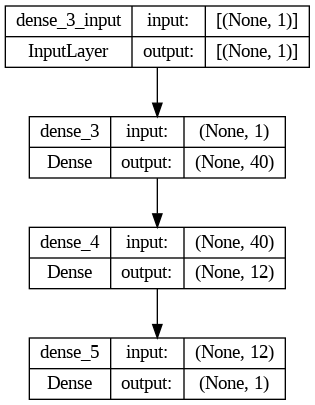

In [73]:
tf.keras.utils.plot_model(ann, show_shapes=True)

In [74]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                80        
                                                                 
 dense_4 (Dense)             (None, 12)                492       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 585 (2.29 KB)
Trainable params: 585 (2.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
def sinus(x):
  return np.sin(x * (np.pi/180))

In [76]:
def predict(x):
  num = x
  if x > 360:
    while x > 360:
      x -= 360
  elif x < 0:
    while x < 0:
      x += 360
  print(f"Sin({num}) = {sinus(num)}")
  print(f"Sin({num}) predicted: {ann.predict([x])}")

In [77]:
predict(0.5)

Sin(0.5) = 0.008726535498373935
1/1 [==============================] - 0s 34ms/step
Sin(0.5) predicted: [[0.47355646]]


In [78]:
predict(-15)

Sin(-15) = -0.25881904510252074
1/1 [==============================] - 0s 73ms/step
Sin(-15) predicted: [[4.6526537]]
